## Exploratory Data Analysis (EDA) and Preprocessing of Sentiment Analysis Dataset for LLMs 

### 1. Setup and Imports

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re

### 2. Data loading

In [3]:
data_file="Rest-Mex_2025_train.csv"
data_path = os.path.join('../data', data_file)
if not os.path.exists(data_path):
    raise FileNotFoundError(f"El archivo de datos no se encontró en: {data_path}")

print(f"Cargando datos desde {data_path}...")
df = pd.read_csv(data_path)

Cargando datos desde ../data\Rest-Mex_2025_train.csv...


### 3. Initial Data Exploration

In [7]:
df.head()

,Title,Review,Polarity,Town,Region,Type
0,Mi Lugar Favorito!!!!,Excelente lugar para comer y pasar una buena n...,5.0,Sayulita,Nayarit,Restaurant
1,lugares interesantes para visitar,"andar mucho, así que un poco difícil para pers...",4.0,Tulum,QuintanaRoo,Attractive
2,No es el mismo Dreams,"Es nuestra cuarta visita a Dreams Tulum, elegi...",3.0,Tulum,QuintanaRoo,Hotel
3,un buen panorama cerca de CancÃºn,"Estando en CancÃºn, fuimos al puerto y tomamos...",4.0,Isla_Mujeres,QuintanaRoo,Attractive
4,El mejor,Es un lugar antiguo y por eso me encanto tiene...,5.0,Patzcuaro,Michoacan,Hotel


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208051 entries, 0 to 208050
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Title     208049 non-null  object 
 1   Review    208051 non-null  object 
 2   Polarity  208051 non-null  float64
 3   Town      208051 non-null  object 
 4   Region    208051 non-null  object 
 5   Type      208051 non-null  object 
dtypes: float64(1), object(5)
memory usage: 9.5+ MB


In [9]:
df.isnull().sum()

Title       2
Review      0
Polarity    0
Town        0
Region      0
Type        0
dtype: int64

Review example showing encoding issues with accents

In [10]:
print(df['Title'][3])
print(df['Review'][3])

un buen panorama cerca de CancÃºn
Estando en CancÃºn, fuimos al puerto y tomamos un Ferry a la Isla Mujeres.....despuÃ©s de un corto viaje, llegamos a esta pequeÃ±a isla, donde todo el mundo se desplaza en moto, carritos de golf, bicicleta o simplemente caminando.La recorrimos durante un rato y terminamos en la Playa Norte, donde pasamos la tarde recostadas sobre la arena y baÃ±Ã¡ndonos en el mar...... el agua tiene muy poca profundidad, por lo que puedes adentrarte mucho en el mar simplemente caminando.Si estÃ¡s en CancÃºn, te recomiendo destinar medio dÃ­a para conocer esta simpÃ¡tica isla.


### 3.1. Data Cleaning (Encoding & Accent Correction)

In [4]:
def fix_mojibake(texto):
    try:
        return texto.encode('latin1').decode('utf-8')
    except:
        return texto

# Apply the mojibake fix to the 'Title' and 'Review' columns
df['Title'] = df['Title'].fillna('').apply(fix_mojibake)
df['Review'] = df['Review'].fillna('').apply(fix_mojibake)

In [5]:
# Function to clean newlines, tabs, and extra spaces
def clean_text(text):
    if not isinstance(text, str):
        return text
    text = re.sub(r'[\n\r\t]+', ' ', text)  # Replace newlines, carriage returns, and tabs with a space
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()
# Apply cleaning to relevant columns
df['Title'] = df['Title'].apply(clean_text)
df['Review'] = df['Review'].apply(clean_text)

In [6]:
# Check the encoding issues after applying the fix
print(df['Title'][0])
print(df['Review'][0])

Mi Lugar Favorito!!!!
Excelente lugar para comer y pasar una buena noche!!! El servicio es de primera y la comida exquisita!!!


### 4. Target Variable Analysis

In [14]:
print(np.unique(df['Polarity'])) # Shows unique values in the 'Polarity' column
print('\n', np.unique(df['Type'])) # Shows unique values in the 'Type' column
print('\n', np.unique(df['Town'])) # Shows unique values in the 'Town' column

[1. 2. 3. 4. 5.]

 ['Attractive' 'Hotel' 'Restaurant']

 ['Ajijic' 'Atlixco' 'Bacalar' 'Bernal' 'Chiapa_de_Corzo' 'Cholula'
 'Coatepec' 'Creel' 'Cuatro_Cienegas' 'Cuetzalan' 'Dolores_Hidalgo'
 'Huasca_de_Ocampo' 'Isla_Mujeres' 'Ixtapan_de_la_Sal' 'Izamal' 'Loreto'
 'Malinalco' 'Mazunte' 'Metepec' 'Orizaba' 'Palenque' 'Parras' 'Patzcuaro'
 'Real_de_Catorce' 'San_Cristobal_de_las_Casas' 'Sayulita' 'Tapalpa'
 'Taxco' 'Teotihuacan' 'Tepotzotlan' 'Tepoztlan' 'Tequila' 'Tequisquiapan'
 'Tlaquepaque' 'TodosSantos' 'Tulum' 'Valladolid' 'Valle_de_Bravo'
 'Xilitla' 'Zacatlan']


### 4.1. Distribution of Target Variable

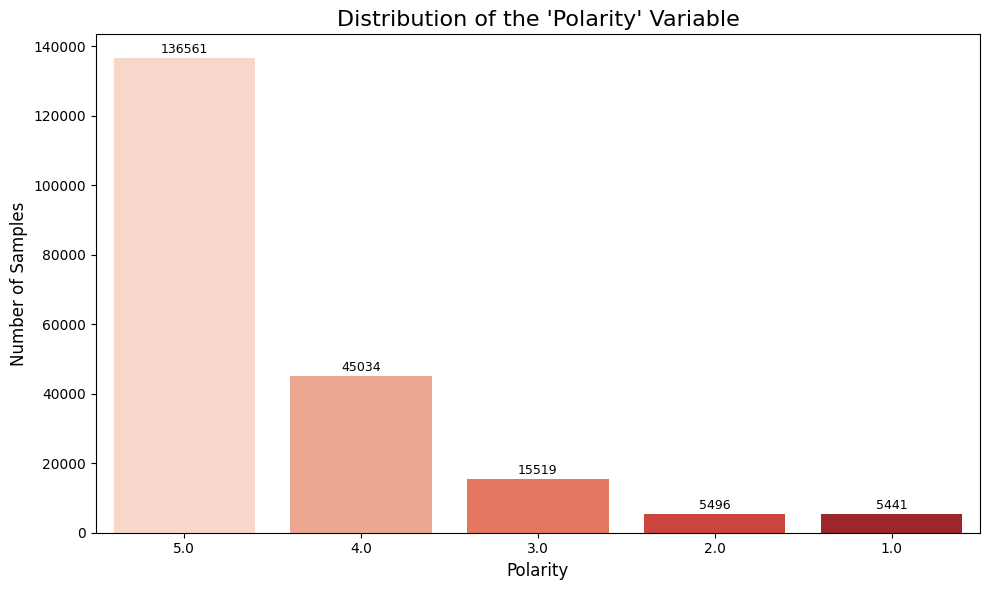

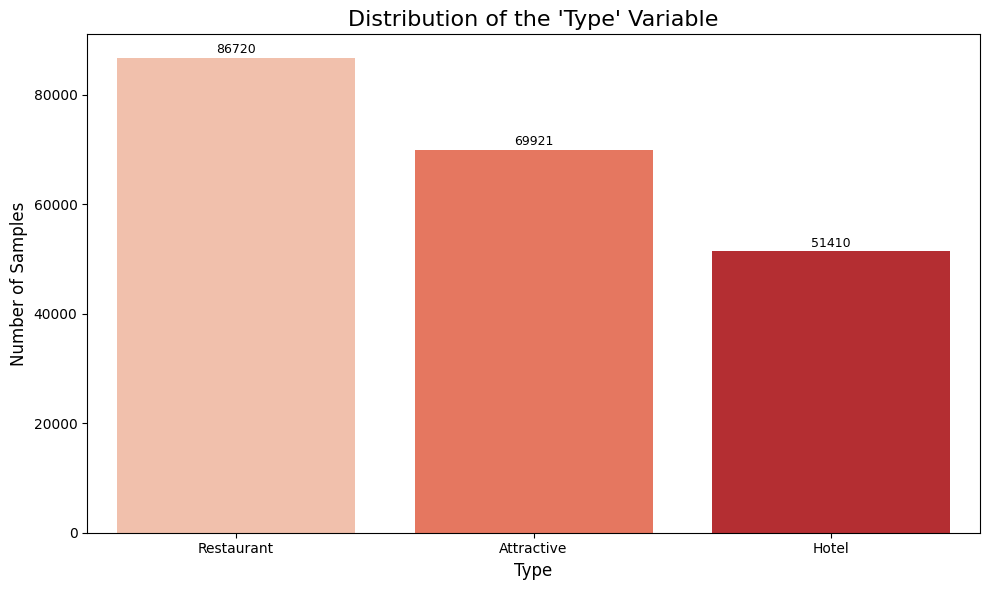

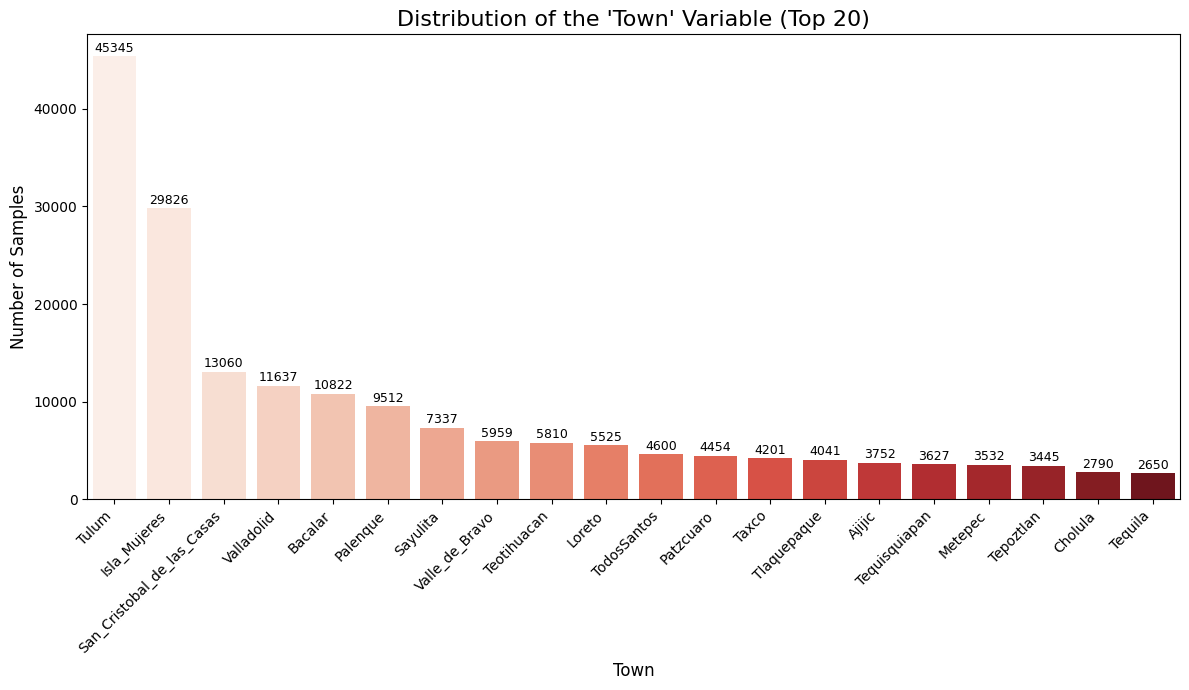

In [15]:
# Distribución de la variable 'Polarity'
paleta = "Reds"
polarity_counts = df['Polarity'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=polarity_counts.index.astype(str),
    y=polarity_counts.values,
    hue=polarity_counts.index.astype(str),
    palette=paleta,
    legend=False,
    ax=ax
)
ax.set_title("Distribution of the 'Polarity' Variable", fontsize=16)
ax.set_ylabel("Number of Samples", fontsize=12)
ax.set_xlabel("Polarity", fontsize=12)
for i, v in enumerate(polarity_counts.values):
    ax.text(i, v + max(polarity_counts.values)*0.01, str(v), color='black', ha='center', fontsize=9)
plt.tight_layout()
plt.show()
# Distribución de la variable 'Type'
paleta = "Reds"
type_counts = df['Type'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=type_counts.index.astype(str),
    y=type_counts.values,
    hue=type_counts.index.astype(str),
    palette=paleta,
    legend=False,
    ax=ax
)
ax.set_title("Distribution of the 'Type' Variable", fontsize=16)
ax.set_ylabel("Number of Samples", fontsize=12)
ax.set_xlabel("Type", fontsize=12)
for i, v in enumerate(type_counts.values):
    ax.text(i, v + max(type_counts.values)*0.01, str(v), color='black', ha='center', fontsize=9)
plt.tight_layout()
plt.show()
# Distribución de la variable 'Town' (Top 20)
paleta = "Reds"
town_counts = df['Town'].value_counts()
top_n_town = 20
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(
    x=town_counts.index[:top_n_town],
    y=town_counts.values[:top_n_town],
    hue=town_counts.index[:top_n_town],
    palette=paleta,
    legend=False,
    ax=ax
)
ax.set_title("Distribution of the 'Town' Variable (Top 20)", fontsize=16)
ax.set_ylabel("Number of Samples", fontsize=12)
ax.set_xlabel("Town", fontsize=12)
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
for i, v in enumerate(town_counts.values[:top_n_town]):
    ax.text(i, v + max(town_counts.values[:top_n_town])*0.01, str(v), color='black', ha='center', fontsize=9)
plt.tight_layout()
plt.show()

### 5. Feature Engineering

### 5.1 Feature Analysis: Text Data (Title & Review)

In [7]:
# Concatenate 'Title' and 'Review' for best feature information
df['Text'] = (df['Title'] + ' ' + df['Review']).str.strip()  # Remove leading/trailing whitespace
df['Text'][0]

'Mi Lugar Favorito!!!! Excelente lugar para comer y pasar una buena noche!!! El servicio es de primera y la comida exquisita!!!'

In [8]:
# Análisis de longitud: crear columnas para número de caracteres y palabras
df['char_count'] = df['Text'].apply(len)
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
df[['Text', 'char_count', 'word_count']].head()


,Text,char_count,word_count
0,Mi Lugar Favorito!!!! Excelente lugar para com...,126,21
1,"lugares interesantes para visitar andar mucho,...",248,42
2,No es el mismo Dreams Es nuestra cuarta visita...,808,141
3,un buen panorama cerca de Cancún Estando en Ca...,589,97
4,El mejor Es un lugar antiguo y por eso me enca...,258,49


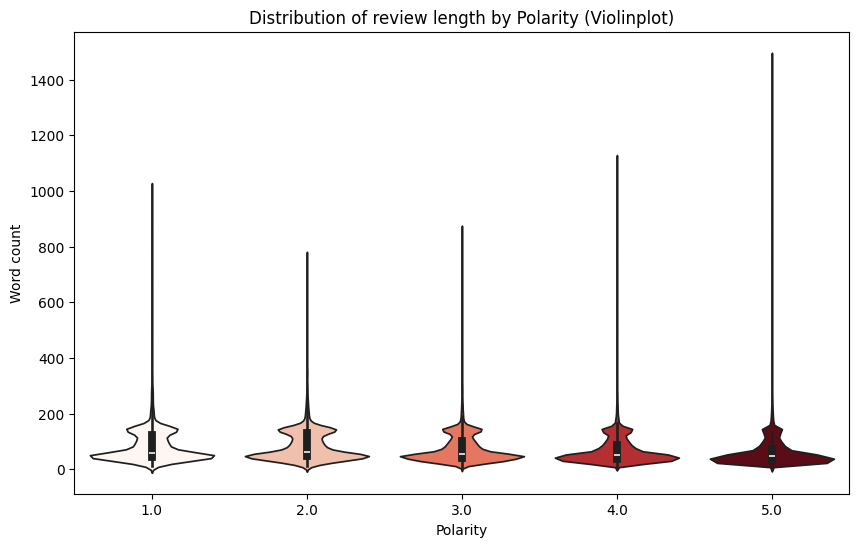

In [9]:
# Violinplot: Relationship between review length and polarity. Distribution of review length (word count) by Polarity
plt.figure(figsize=(10, 6))
sns.violinplot(x='Polarity', y='word_count', data=df, hue='Polarity', palette='Reds', legend=False)
plt.title('Distribution of review length by Polarity (Violinplot)')
plt.xlabel('Polarity')
plt.ylabel('Word count')
plt.show()

Cargando el tokenizer de BETO...
Calculando el número de tokens para cada reseña...

--- Estadísticas de Longitud de Tokens ---
count    208051.000000
mean         85.603006
std          60.922337
min          12.000000
25%          46.000000
50%          66.000000
75%         106.000000
max         512.000000
Name: Text, dtype: float64

--- Percentiles de Longitud de Tokens ---
  - El 90% de las reseñas tienen 171 tokens o menos.
  - El 95% de las reseñas tienen 188 tokens o menos.
  - El 98% de las reseñas tienen 248 tokens o menos.
  - El 99% de las reseñas tienen 317 tokens o menos.


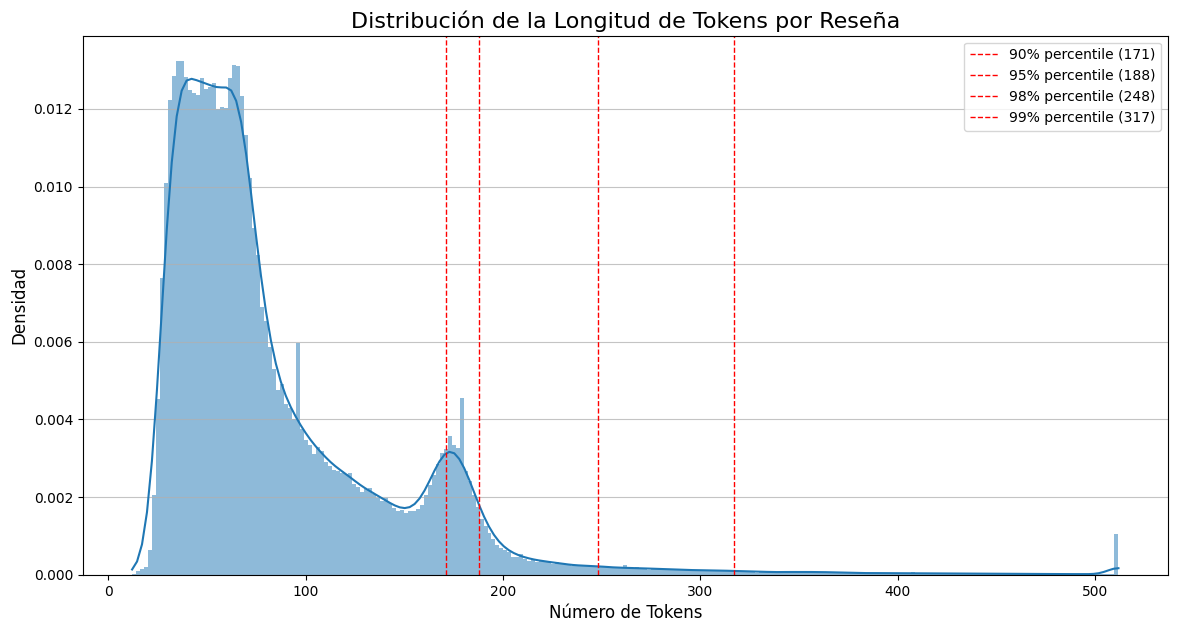


--- Recomendación ---
El 98% de tus reseñas pueden ser representadas con 248 tokens.
Un `max_length` de 256 parece un excelente punto de partida, ya que es la siguiente potencia de 2,
lo que a menudo es eficiente para las GPUs. Cubrirá a la gran mayoría de las reseñas
y será significativamente más rápido que 512.

Sugerencia de valores a probar en tus experimentos:
 - `128`: Para la máxima velocidad (cubriendo a un porcentaje menor de reseñas).
 - `256`: Probablemente el mejor balance entre velocidad y cobertura de información.
 - `384` o `512`: Si quieres maximizar la precisión a costa de un mayor tiempo de entrenamiento.


In [ ]:
# --- Token Length Analysis to find the optimal max_length ---
# This code block will help us decide the value of `max_length` for the tokenizer.
# The goal is to find a value that covers the vast majority of reviews without being
# unnecessarily large, to optimize training speed.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer

# --- 1. Load the Tokenizer ---
# It is CRUCIAL to use the same tokenizer that will be used in training.
# Different tokenizers split words differently.
print("Loading BETO tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# --- 2. Calculate Token Lengths ---
# Make sure the 'text' column is already created and cleaned in your DataFrame `df`.
# If not, run the previous cleaning cells first.
print("Calculating the number of tokens for each review...")
token_lengths = df['Text'].apply(lambda x: len(tokenizer.encode(x, max_length=512, truncation=True)))

# --- 3. Statistical Analysis and Visualization ---
print("\n--- Token Length Statistics ---")
print(token_lengths.describe())

# Create the plot
plt.figure(figsize=(14, 7))
sns.histplot(token_lengths, kde=True, stat="density", linewidth=0)
plt.title('Distribution of Token Length per Review', fontsize=16)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', alpha=0.75)

# --- 4. Calculate Key Percentiles ---
# This will tell us what length covers 90%, 95%, 98%, and 99% of the data.
percentiles = [0.90, 0.95, 0.98, 0.99]
percentile_values = token_lengths.quantile(percentiles)

print("\n--- Token Length Percentiles ---")
for p, v in percentile_values.items():
    print(f"  - {p*100:.0f}% of reviews have {int(v)} tokens or fewer.")
    # Add a vertical line to the plot for each percentile
    plt.axvline(x=v, color='red', linestyle='--', linewidth=1, label=f'{p*100:.0f}% percentile ({int(v)})')

plt.legend()
plt.show()

# --- 5. Conclusion and Recommendation ---
# Based on the percentiles, we can make an informed decision.
p98_value = int(percentile_values[0.98])
print("\n--- Recommendation ---")
print(f"98% of your reviews can be represented with {p98_value} tokens.")
print("A `max_length` of 256 seems like an excellent starting point, as it is the next power of 2,")
print("which is often efficient for GPUs. It will cover the vast majority of reviews")
print("and will be significantly faster than 512.")
print("\nSuggested values to try in your experiments:")
print(" - `128`: For maximum speed (covering a smaller percentage of reviews).")
print(" - `256`: Probably the best balance between speed and information coverage.")
print(" - `384` or `512`: If you want to maximize accuracy at the cost of longer training time.")



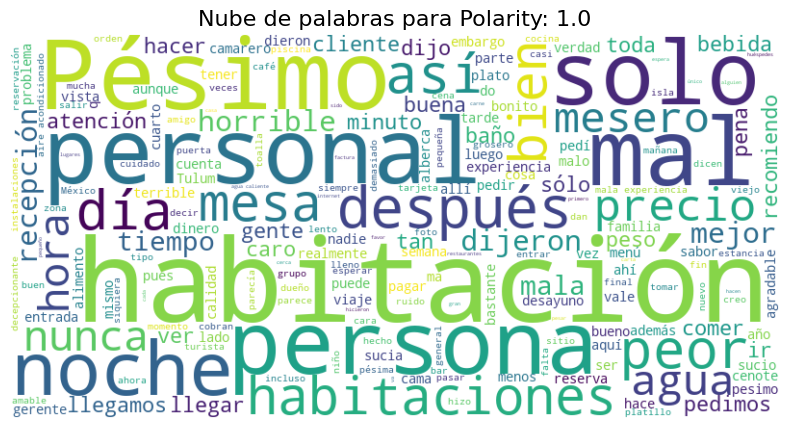

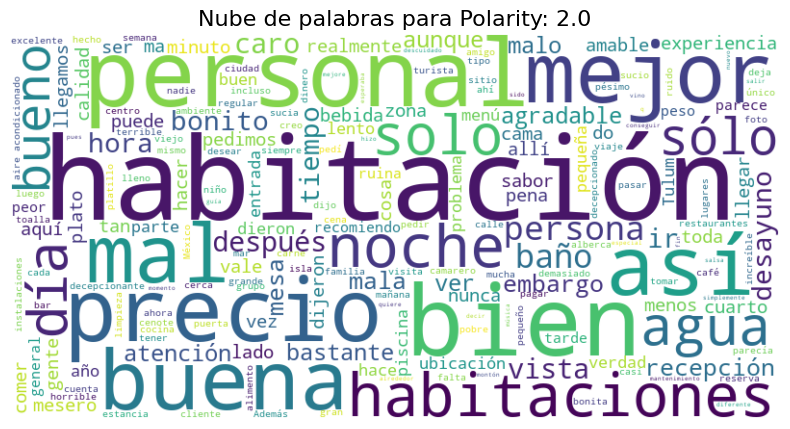

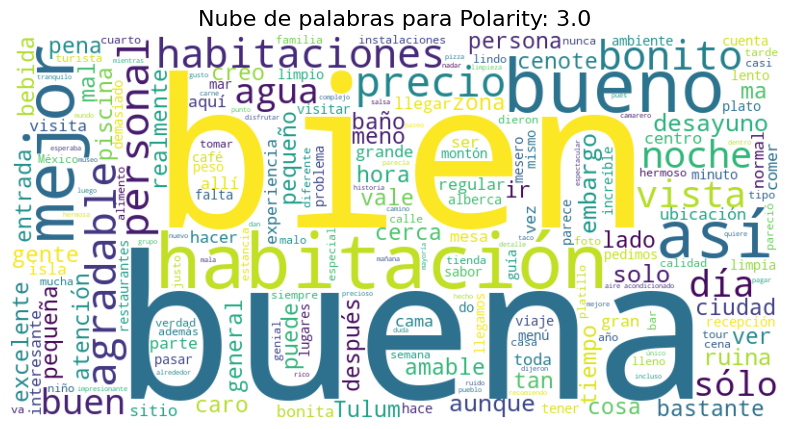

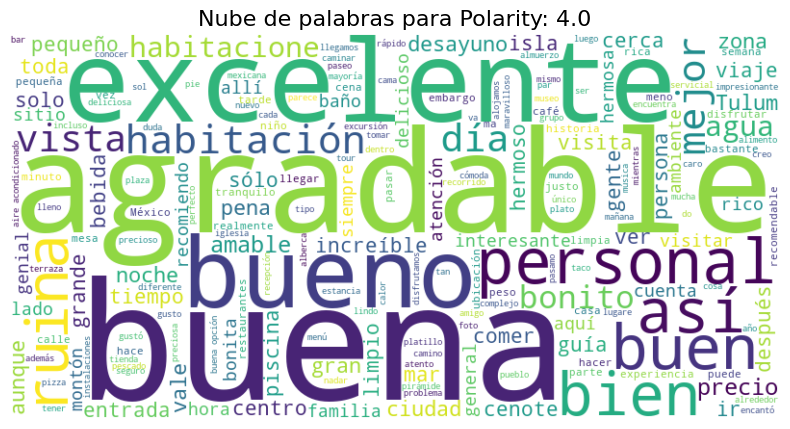

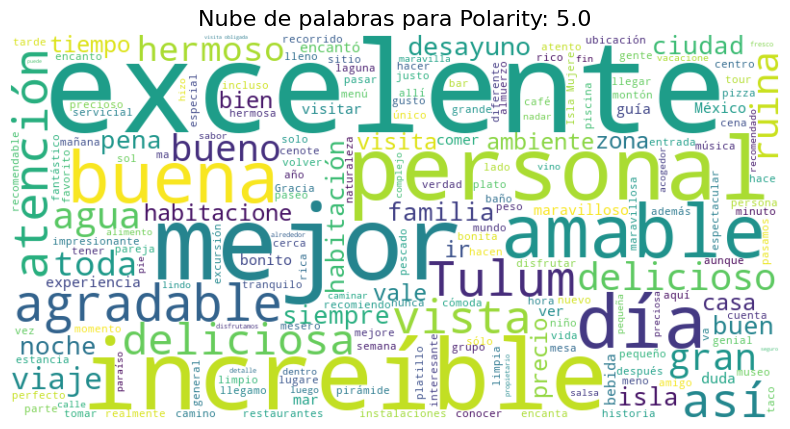

In [19]:
# Nube de palabras por Polarity
from wordcloud import WordCloud # type: ignore
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# --- Carga y preparación de stopwords en español ---
# Aseguramos que las stopwords de NLTK estén disponibles
try:
    stopwords.words('spanish')
except LookupError:
    print("Descargando stopwords de NLTK para español...")
    nltk.download('stopwords')

# Creamos nuestro conjunto de stopwords en español
stopwords_es = set(stopwords.words('spanish'))

# (Opcional) Puedes añadir palabras personalizadas que veas en tu EDA
# Por ejemplo, si ves que "hotel", "restaurante" aparecen mucho y no aportan, las puedes añadir.
custom_stopwords = {'hotel', 'restaurante', 'lugar', 'playa', 'comida', 'servicio','si'}
stopwords_es.update(custom_stopwords)


# --- Generación de la nube de palabras ---
polarities = sorted(df['Polarity'].unique())

for pol in polarities:
    text = ' '.join(df[df['Polarity'] == pol]['Text'].dropna().astype(str))
    
    # ¡Aquí está la magia! Le pasamos nuestra lista de stopwords en español.
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        stopwords=stopwords_es, 
        colormap='viridis'
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de palabras para Polarity: {pol}', fontsize=16)
    plt.show()

### 5. 2 Feature Analysis: Categorical Data (Type, Town)

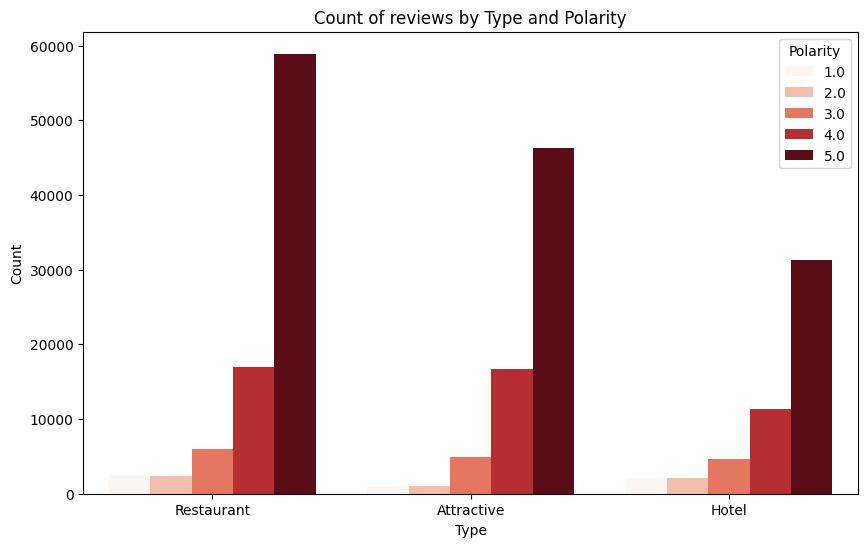

In [20]:
# Polarity vs. Type: Countplot with hue for Polarity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type', hue='Polarity', palette='Reds')
plt.title('Count of reviews by Type and Polarity')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Polarity')
plt.show()

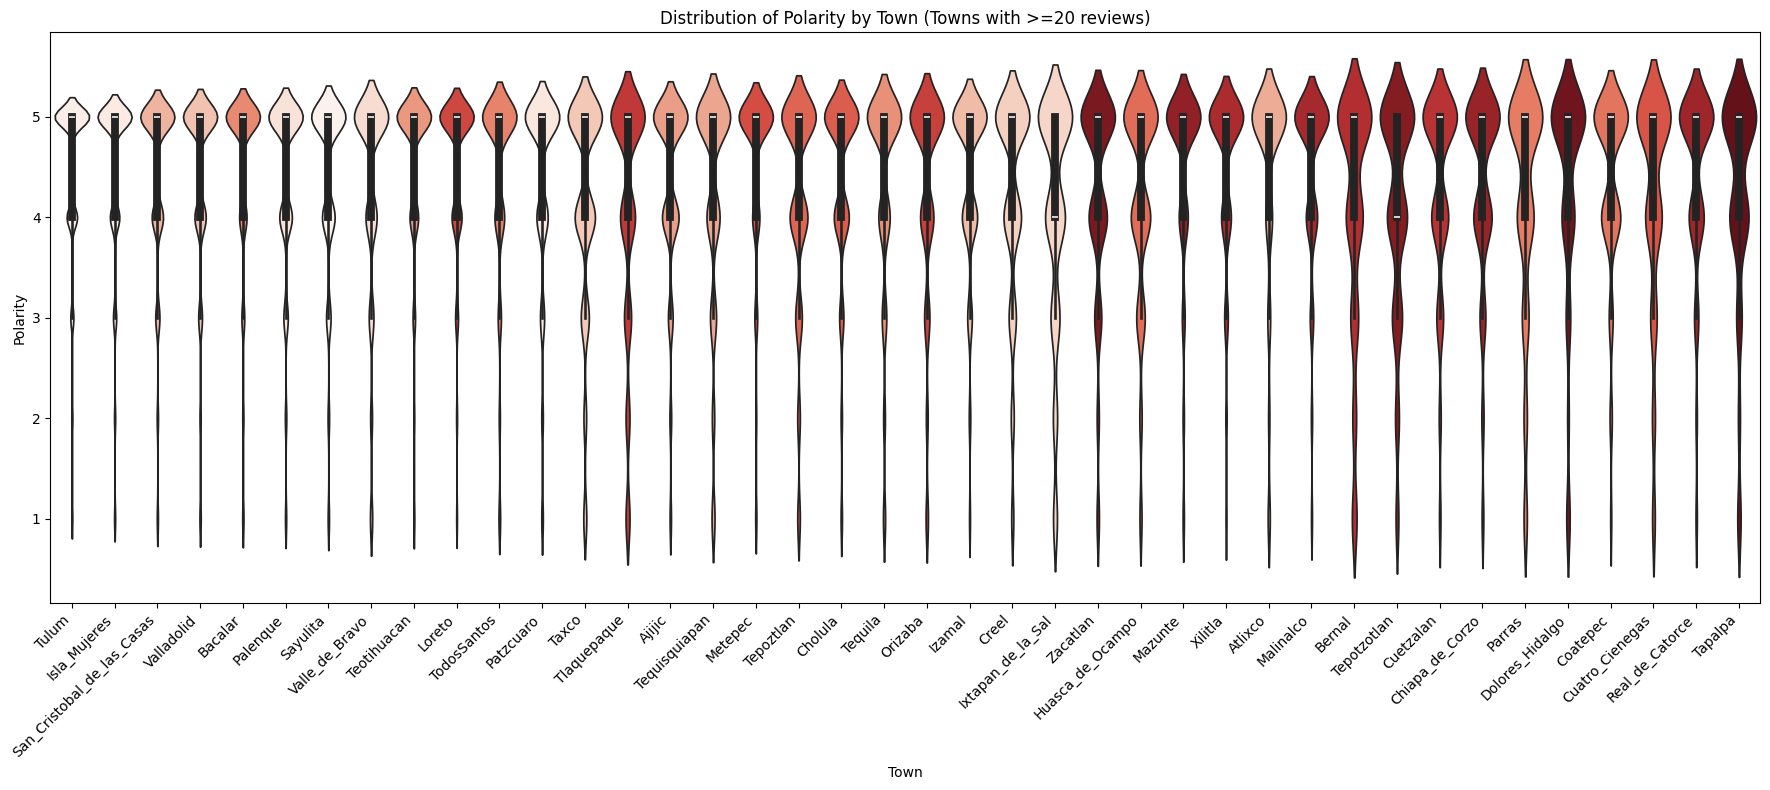

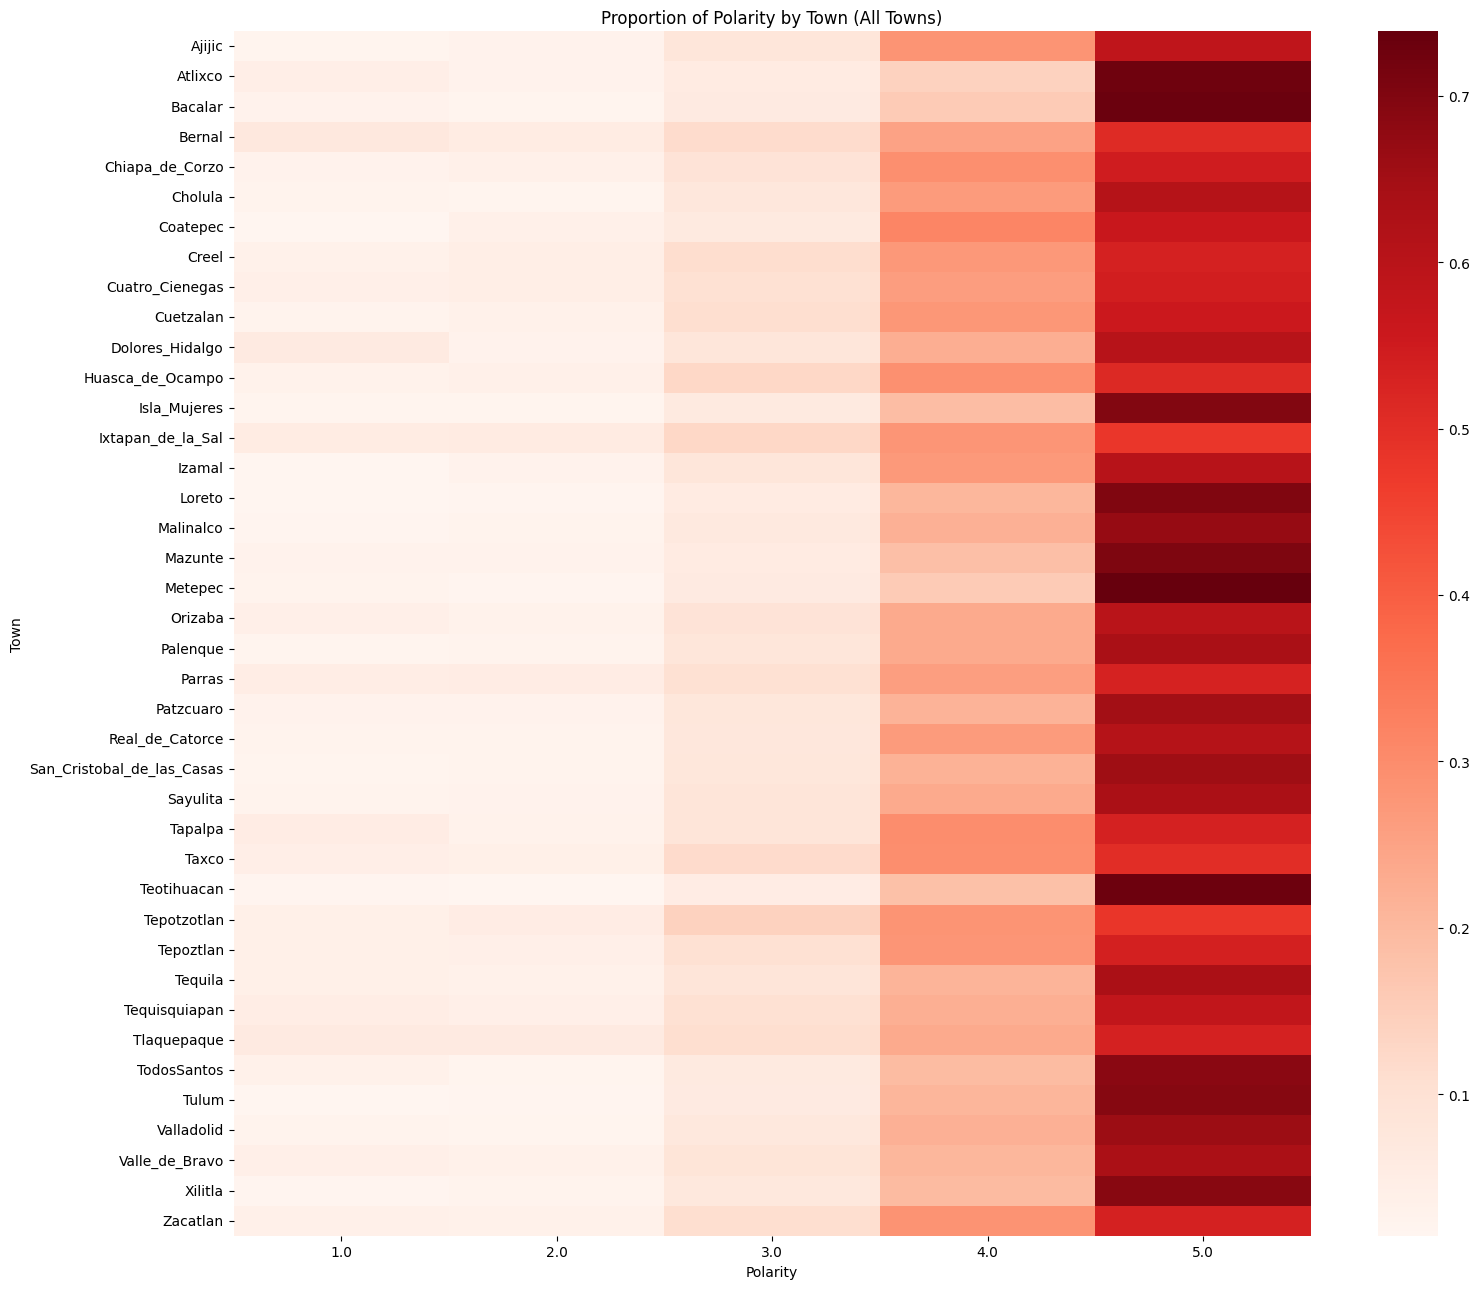

In [21]:
# Violinplot: Distribution of Polarity by Town (all towns, sorted by median polarity)
plt.figure(figsize=(18, 8))
# Only plot towns with at least 20 reviews for readability
town_counts = df['Town'].value_counts()
valid_towns = town_counts[town_counts >= 20].index
# Assign hue='Town' and legend=False to avoid FutureWarning
sns.violinplot(data=df[df['Town'].isin(valid_towns)], x='Town', y='Polarity', hue='Town', palette='Reds', order=valid_towns, legend=False)
plt.title('Distribution of Polarity by Town (Towns with >=20 reviews)')
plt.xlabel('Town')
plt.ylabel('Polarity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Heatmap: Proportion of each Polarity per Town (all towns)
pivot = df.pivot_table(index='Town', columns='Polarity', values='Review', aggfunc='count', fill_value=0)
pivot = pivot.div(pivot.sum(axis=1), axis=0)
plt.figure(figsize=(16, max(8, int(len(pivot)/3))))
sns.heatmap(pivot, cmap='Reds', annot=False, cbar=True)
plt.title('Proportion of Polarity by Town (All Towns)')
plt.xlabel('Polarity')
plt.ylabel('Town')
plt.tight_layout()
plt.show()

#### 6. Summary of Key Findings from EDA and Preprocessing
- **Severe class imbalance in Polarity:** The dataset shows a strong imbalance in the distribution of sentiment classes, which will require careful handling during model training (e.g., resampling or class weighting).
- **Text length varies by Polarity:** The length of reviews (in words and characters) differs across polarity classes. This suggests that review length may be a useful feature, and that truncation or padding will be necessary for modeling.
- **Type of establishment influences sentiment:** The 'Type' variable is associated with different distributions of polarity, indicating that establishment type may impact customer sentiment.
- **Town distribution is highly skewed:** Most reviews are concentrated in a few towns (e.g., Tulum, Isla Mujeres), while many towns have very few reviews. This geographic imbalance may affect model generalization and should be considered in analysis and modeling.
- **Text cleaning and encoding issues addressed:** The dataset contained encoding artifacts and unwanted characters (e.g., newlines, tabs), which were successfully cleaned. This improves the quality of text features for downstream tasks.
- **Word clouds reveal polarity-specific vocabulary:** Distinctive words are associated with each polarity class, as shown by the word clouds. This supports the use of text features for sentiment classification.
- **Potential for feature engineering:** The EDA highlights opportunities for further feature engineering, such as combining text features with categorical variables (Type, Town) and exploring interactions between them.

### 7. Final design decisions for pipeline
- **Input Text:** Use cleaned text data from 'Title' and 'Review' columns, concatenated into a single text feature named 'Text'.
- **Target Variables:**
    - **Polarity:** Use the 'Polarity' column as the target variable for sentiment classification. To be used as the primary numerical label (0-4).
    - **Type:** To be converted into numerical labels (e.g., Hotel: 0, Restaurant: 1, Attractive: 2).
    - **Town:** To be converted into numerical labels (0 to N-1 towns)
- **Modeling Strategy:** Class imbalance in Polarity and Town will be addressed using class weights.
- **Tokenization and max_length:**
    - Analysis shows that 98% of reviews can be represented with 248 tokens.
    - A `max_length` of 256 is an excellent starting point, as it is the next power of 2 and is often efficient for GPUs. This will cover the vast majority of reviews and be significantly faster than 512.
    - **Suggested values to try in your experiments:**
        - `128`: For maximum speed (covering a smaller percentage of reviews).
        - `256`: Probably the best balance between speed and information coverage.
        - `384` or `512`: If you want to maximize accuracy at the cost of longer training time.